In [2]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=yf.download("TSLA")

[*********************100%%**********************]  1 of 1 completed


In [18]:
returns=np.log(1+df['Adj Close'].pct_change())
returns

Date
2010-06-29         NaN
2010-06-30   -0.002515
2010-07-01   -0.081723
2010-07-02   -0.134312
2010-07-06   -0.175470
                ...   
2024-04-01   -0.003248
2024-04-02   -0.050267
2024-04-03    0.010448
2024-04-04    0.016083
2024-04-05   -0.036967
Name: Adj Close, Length: 3466, dtype: float64

In [19]:
mu,sigma=returns.mean(),returns.std()
mu,sigma

(0.0013390849158206198, 0.03563320586611515)

In [20]:
sim_rets=np.random.normal(mu,sigma,252)
sim_rets

array([-0.02068578,  0.01893349,  0.00096621, -0.02271506, -0.00889046,
       -0.03174878,  0.05675422, -0.04289692,  0.03602764,  0.00069706,
        0.0136277 ,  0.01000715,  0.04578264, -0.00861856, -0.06841387,
        0.01304422,  0.00871855,  0.02027006, -0.00023772, -0.04027856,
       -0.01401197, -0.03857942,  0.0899091 , -0.00463825,  0.00441676,
       -0.03143047,  0.01953872, -0.00331072,  0.03838602,  0.00195506,
        0.02955695,  0.10708735,  0.00171498,  0.04430094,  0.03531812,
        0.00622671,  0.03362476, -0.05470084, -0.02317267, -0.00578252,
        0.00066701, -0.02028874,  0.04371432,  0.0199326 , -0.01917025,
       -0.02069482,  0.00699374,  0.04164018, -0.03074872,  0.01953137,
        0.02013522, -0.02676619,  0.02254008, -0.00507325, -0.05043933,
       -0.01626623,  0.01562488, -0.03474521, -0.00036354, -0.03098461,
       -0.03046932,  0.04843796, -0.02742044, -0.02111215, -0.00257506,
       -0.00558705, -0.0501915 , -0.02271766,  0.04170364,  0.02

In [21]:
initial=df['Adj Close'].iloc[-1]
initial

164.89999389648438

In [22]:
sim_prices=initial*(sim_rets+1).cumprod()
sim_prices

array([161.48890927, 164.54645838, 164.70544475, 160.96415123,
       159.5331056 , 154.46812337, 163.23484186, 156.23256997,
       161.86126049, 161.97408758, 164.18142262, 165.8244114 ,
       173.41629025, 171.92169142, 160.15986238, 162.24902244,
       163.66359838, 166.98106999, 166.94137593, 160.21721788,
       157.97225842, 151.87778024, 165.53297462, 164.76519204,
       165.49292014, 160.29140063, 163.42328897, 162.88224083,
       169.13464184, 169.4653108 , 174.47418935, 193.15816772,
       193.48942974, 202.06119367, 209.1976147 , 210.50022703,
       217.57824769, 205.6765338 , 200.91045919, 199.7486895 ,
       199.88192387, 195.82657126, 204.38699662, 208.46096109,
       204.46471293, 200.23335249, 201.6337328 , 210.02979806,
       203.57164991, 207.54768401, 211.7267025 , 206.05958431,
       210.70418282, 209.63522681, 199.06136722, 195.82338943,
       198.88310581, 191.97287108, 191.90308055, 185.95703811,
       180.29105277, 189.02398373, 183.84086351, 179.95

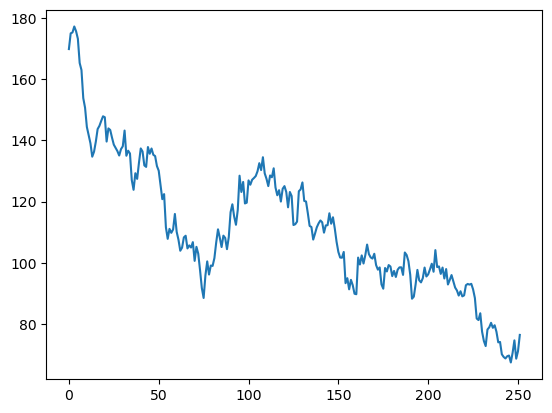

In [16]:
plt.plot(sim_prices)

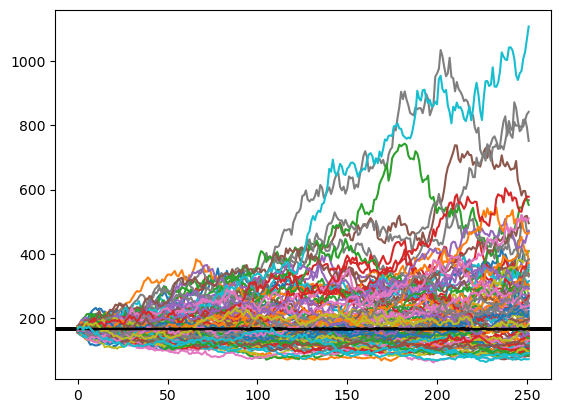

In [17]:
for i in range(100):
    sim_rets=np.random.normal(mu,sigma,252)
    sim_prices=initial*(sim_rets+1).cumprod()
    plt.axhline(initial,c='k')
    plt.plot(sim_prices)